# Importación de Bibliotecas

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
import nltk
from scipy.sparse import csr_matrix

# Carga de datos

Importamos el dataset de entrenamiento

In [52]:
df = pd.read_csv("./train.csv")

ds_trabajo = df.copy()
ds_trabajo.head(5)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [53]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(nltk.corpus.stopwords.words('spanish'))

def remove_stopwords(text):
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

ds_trabajo.review_es = ds_trabajo.review_es.apply(remove_stopwords)
ds_trabajo.head

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franco.patiño\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franco.patiño\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<bound method NDFrame.head of           ID                                          review_es sentimiento
0          0  críticos mencionado después ver solo 1 Oz Epis...    positivo
1          1  pequeña pequeña producción.La técnica filmació...    positivo
2          2  Pensé manera maravillosa pasar tiempo fin sema...    positivo
3          3  Básicamente , familia niño pequeño ( Jake ) pi...    negativo
4          4  `` amor tiempo '' Petter Mattei película visua...    positivo
...      ...                                                ...         ...
49995  49995  Pensé película hizo buen trabajo derecha.No ta...    positivo
49996  49996  Mala parcela , mal diálogo , mala actuación , ...    negativo
49997  49997  católica enseñada escuelas primarias parroquia...    negativo
49998  49998  Voy tener desacuerdo comentario anterior lado ...    negativo
49999  49999  Nadie espera películas Star Trek altas artes ,...    negativo

[50000 rows x 3 columns]>

Como Bayes Naïve no interpreta palabras, vamos a convertirlas en vectores utilizando un modelo de Bag of Words.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(ds_trabajo.review_es, ds_trabajo.sentimiento, test_size=0.30, random_state=25, shuffle=True)

In [55]:
vectorizer = CountVectorizer()
corpus = X_train
X_train_counts = vectorizer.fit_transform(corpus)

Realizamos el cálculo de la frecuencia invertida usando smooth

In [56]:
# vectorizer = TfidfVectorizer(smooth_idf=True)
# vectorizer.fit_transform(X.toarray()).toarray()


In [57]:
model = make_pipeline(CountVectorizer(lowercase=False), MultinomialNB())

model.fit(X_train_counts.toarray(), y_train)
X_test_counts = vectorizer.transform(X_test)
predicted_categories = model.predict(X_test_counts)

MemoryError: Unable to allocate 38.5 GiB for an array with shape (35000, 147686) and data type int64

In [ ]:
print("La accuracy es {}".format(accuracy_score(y_test, predicted_categories)))
print("La precision es {}".format(precision_score(y_test, predicted_categories, average='macro')))
print("El recall es {}".format(recall_score(y_test, predicted_categories, average='macro')))
print("El F1 es {}".format(f1_score(y_test, predicted_categories, average='macro')))


NameError: name 'predicted_categories' is not defined

Text(50.722222222222214, 0.5, 'True')

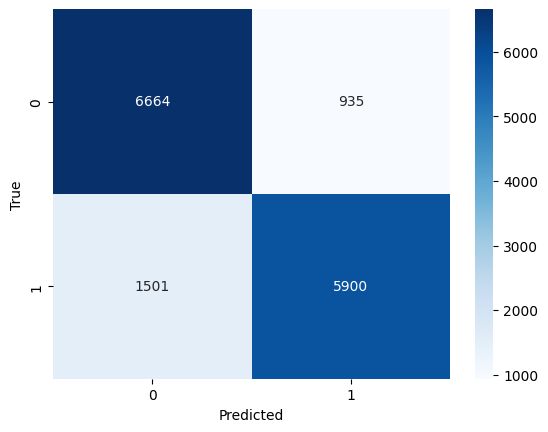

In [ ]:
cm = confusion_matrix(y_test,predicted_categories)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


In [ ]:
import pickle

with open('./models/naive_bayes/nb_model.pickle', 'wb') as archivo:
    pickle.dump(model, archivo)

In [ ]:
# IMPORTAR CSV ...
# ds_hotel=pd.read_csv('./train.csv')
ds_test = pd.read_csv('./test.csv')
ds_trabajo = ds_test.copy()

# PREDICCIONES ...
import pickle
with open('models/naive_bayes/nb_model.pickle', 'rb') as f:
    modelo = pickle.load(f)

vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(ds_trabajo.review_es)

# ds_trabajo_encoded = ds_trabajo.drop('sentimiento',axis=1)
predicciones = modelo.predict(X_test)

df_submission = pd.DataFrame({'ID': ds_trabajo.ID, 'sentimiento': predicciones})
df_submission.head()

# SUBMISSION ...
df_submission.to_csv('submissions/naive_bayes/nb_submission.csv', index=False)

AttributeError: lower not found